### **讀入資料**

> 可以從第一個實作複製過來

In [1]:
import pandas as pd

# TODO：貼上網址抓資料
url = "https://raw.githubusercontent.com/CSIE-Camp/example_code_2024/main/ML/1_Machine_Learning/807/chinese_science_score.csv"
data = pd.read_csv(url)

### **計算 loss function**

> 設定 x, y（上一個實作一樣有）

In [2]:
x = data['chinese']
y = data['science']

> 計算 (a, b) = (0, 0) 的 loss 值

In [3]:
a = 0
b = 0

y_pred = a*x + b
# TODO：設定 loss function 
loss = (y - y_pred)**2

# TODO：計算平均
loss.sum() / len(x)

6548.758620689655

> 用 function 包起來

In [4]:
def compute_loss(x, y, a, b):
    y_pred = a*x + b
    loss = (y - y_pred)**2
    loss = loss.sum() / len(x)

    return loss

> 測試 function

In [6]:
compute_loss(x, y, 7, 10)

175488.5172413793

### **固定 b 值，觀察 loss**

> a = [-100, 100], b = 0

In [7]:
loss_all = []

for a in range(-100, 101):
    loss = compute_loss(x, y, a, 0)
    loss_all.append(loss)

loss_all

[47899348.75862069,
 46955895.68965517,
 46021826.96551724,
 45097142.5862069,
 44181842.551724136,
 43275926.862068966,
 42379395.51724138,
 41492248.51724138,
 40614485.862068966,
 39746107.551724136,
 38887113.5862069,
 38037503.96551724,
 37197278.68965517,
 36366437.75862069,
 35544981.172413796,
 34732908.93103448,
 33930221.03448276,
 33136917.48275862,
 32352998.275862068,
 31578463.413793102,
 30813312.896551725,
 30057546.724137932,
 29311164.896551725,
 28574167.413793102,
 27846554.275862068,
 27128325.48275862,
 26419481.03448276,
 25720020.931034483,
 25029945.172413792,
 24349253.75862069,
 23677946.689655174,
 23016023.96551724,
 22363485.586206898,
 21720331.55172414,
 21086561.862068966,
 20462176.51724138,
 19847175.51724138,
 19241558.862068966,
 18645326.55172414,
 18058478.586206898,
 17481014.96551724,
 16912935.689655174,
 16354240.75862069,
 15804930.172413792,
 15265003.931034483,
 14734462.034482758,
 14213304.48275862,
 13701531.27586207,
 13199142.413793104

> 畫圖觀察結果

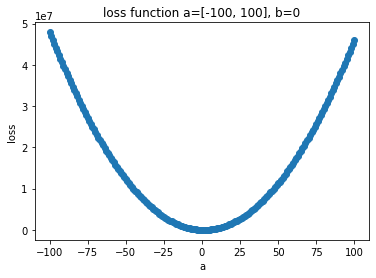

In [8]:
import matplotlib.pyplot as plt

# TODO：將所有點連起來
plt.scatter(range(-100, 101), loss_all)

plt.title("loss function a=[-100, 100], b=0")
plt.xlabel("a")
plt.ylabel("loss")

plt.show()

### **窮舉所有 a, b 值的 loss**

> a = [-100, 100], b = [-100, 100]

In [9]:
import numpy as np

a_all = np.arange(-100, 101)
b_all = np.arange(-100, 101)
loss_all = np.zeros((201, 201))

i = 0
for a in a_all:
    j = 0
    for b in b_all:
        loss = compute_loss(x, y, a, b)
        loss_all[  i, j  ] = loss

        j = j+1
    i = i+1

> 觀察 a_all, b_all, loss_all

In [10]:
a_all

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   

> 目標
> - 觀察 3D 圖片
> - 畫出曲面圖（plot_surface）
> - 網格化 a_all 和 b_all（meshgrid）https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
> - 把網格畫出來（plot_wireframe）
>> **尋找最低的 loss 值在哪裡**

> 可自行嘗試
- 設定背景顏色
- 增加中文字體
- 設定資訊（標題，軸線名稱）
- 查看視角的改變
- 設定圖片大小（figure）

[100] [175] [0] [75]


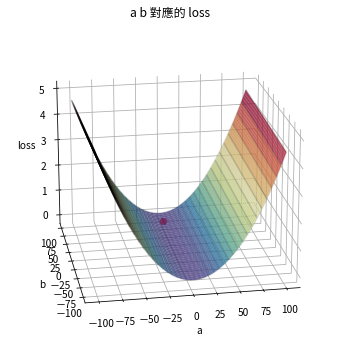

In [14]:
plt.figure(figsize=(6, 6)) # 圖片大小

ax = plt.axes(projection = "3d")
ax.view_init(20, -100) # 查看視角
ax.xaxis.set_pane_color((1, 1, 1)) # 背景顏色
ax.yaxis.set_pane_color((1, 1, 1))
ax.zaxis.set_pane_color((1, 1, 1))

b_grid, a_grid = np.meshgrid(b_all, a_all) # 網格化
######   https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
ax.plot_surface(a_grid, b_grid, loss_all, cmap="Spectral_r", alpha=0.8)
ax.plot_wireframe(a_grid, b_grid, loss_all, color="black", alpha=0.15)

# 設定資訊
ax.set_title("a b 對應的 loss")
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("loss")

# TODO：尋找 loss 最少的點
a_index, b_index = np.where(loss_all == np.min(loss_all))
print(a_index, b_index, a_all[a_index], b_all[b_index])
ax.scatter(a_all[a_index], b_all[b_index], loss_all[a_index, b_index], color = "red", s=40)


plt.show()

> 加上中文字體

In [13]:
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family = "ChineseFont")

> 測試得到的 a, b 它的 loss 值是多少？

In [15]:
compute_loss(x, y, a_all[a_index], b_all[b_index])

949.6206896551724

## ``` 理科 = a_all[a_index] * 文科 + b_all[b_index] ```